## Surprise Housinng - Advanced Regression Assignment

#### Problem Statement: 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. <br/>

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house?

- How well those variables describe the price of a house?



#### Business Objective:
- Build a Regression model that will help the company to understand how exactly the prices vary with different variables of properties.

- The model will help the management to manipulate their business strategy to yeild higher returns.

- The model will be a good way for management to understand the pricing dynamics of a new market. 



#### Brief Walkthrough of the notebook:
    1. Importing the required libraries
    2. Data Loading and basic inspection
    3. Detailed Inspection of the data [Used SweetViz for this]
    4. Data Cleaning
    5. EDA post data cleaning
    6. Feature Engineering
    7. Splitting the data
    8. Transforming the data: Scaling
    9. Modelling and Evaluation:
        A. Ridge Regression
        B. Lasso Regression


### Importing the required libraries

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sweetviz as sv
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Loading and basic inspection

In [244]:
# Loading the csv file and I am considering the Id feild as index for the dataframe
df = pd.read_csv('train.csv', index_col= 'Id')

In [245]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [246]:
#checking the size of dataframe
df.shape

(1460, 80)

In [247]:
#Checking the count of values in each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [248]:
# Checking general stats
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [249]:
# Checking for the count of missing values
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

###### Summary:
    - There are 80 features(Columns) with 1460 tuples.
    - The data is mix of numerical and categorical type in good number.
    - There are a few features with missing values, missing value imputation is required.

### Detailed Inspection

I am using an auto EDA tool/library- SweetViz for detailed inpection to save time on EDA part and focus more on data preprocessing and modelling.

In [250]:
#report=sv.analyze(df)
#report.show_html('eda_report.html')

Summary:
- The feature "Alley" has 98% missing values. There are two calsses in this feature- Grvl & Pavel. We will drop this column because imputing 98% missing values doesn't make any sense
- The feature "PoolQC" has more than 99% missing values
- The feature "Fence" has around 81% missing values
- The feature "MiscFeature" has 96% missing values
- The feature "FireplaceQu" has around 47% missing values
- I will dropping all the features with more than 45% missing values <br/>
- Dropping the following columns as well because of unbalanced classes:
    - "PoolArea" has 99% of values as 0 which indicates NO 
    - "MiscVal" has 96.4% of values as 0
    - "3SsnPorch " has 98% of values as 0
    - "GarageCond " has 96% of values as TA
    - "GarageQual " has 96% of values as TA
    - "Functional " has 93% of values as typ 
    - "KitchenAbvGr " has 95% of values as 1 
    - "BsmtHalfBath " has 94% of values as 0
    - "LowQualFinSF " has 98.2% of values as 0
    - "Electrical " has 91% of values as Sbrkr
    - "Heating " has 98% of values as GasA 
    - "RoofMatl " has 98% of values as CompShg

### Data Cleaning


In [251]:
# Dropping the columns with more than 45% missing values

df.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis=1, inplace=True)

In [252]:
# Checking the features for more than 45% missing values again

((df.isnull().sum()/df.shape[0])*100).round(2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [253]:
#dropping columns which are highly unbalanced[Single class with more than 90% frequency]

df.drop(["PoolArea","MiscVal", "3SsnPorch", 'GarageCond', 'GarageQual', 'Functional', 'KitchenAbvGr', 'BsmtHalfBath',
        "LowQualFinSF", "Electrical", "Heating", "RoofMatl"], axis=1, 
        inplace= True)

In [254]:
df.shape

(1460, 63)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

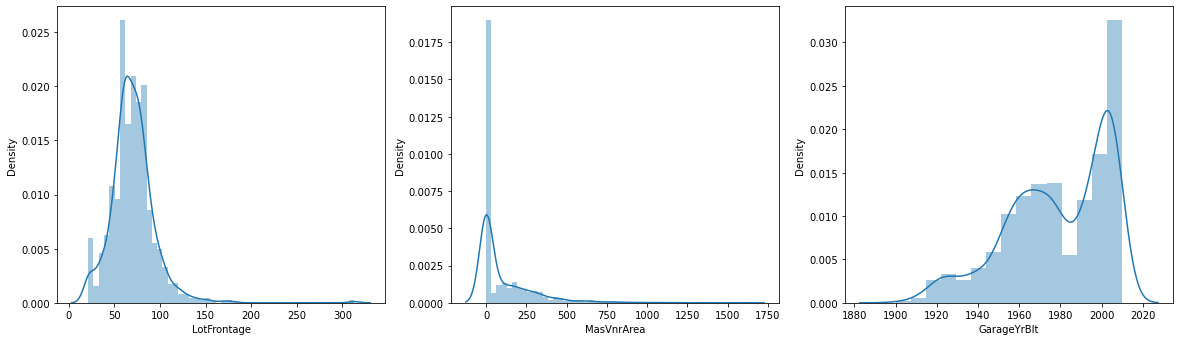

In [255]:
#plotting a few numerical features for ease in imputation
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(df['GarageYrBlt'])

In [256]:
# Imputing missing values in "LotFrontage" with median

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [257]:
# Imputing missing values in "MasVnrArea" with median

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [258]:
# Imputing missing values in "GarageYrBlt" with mean

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

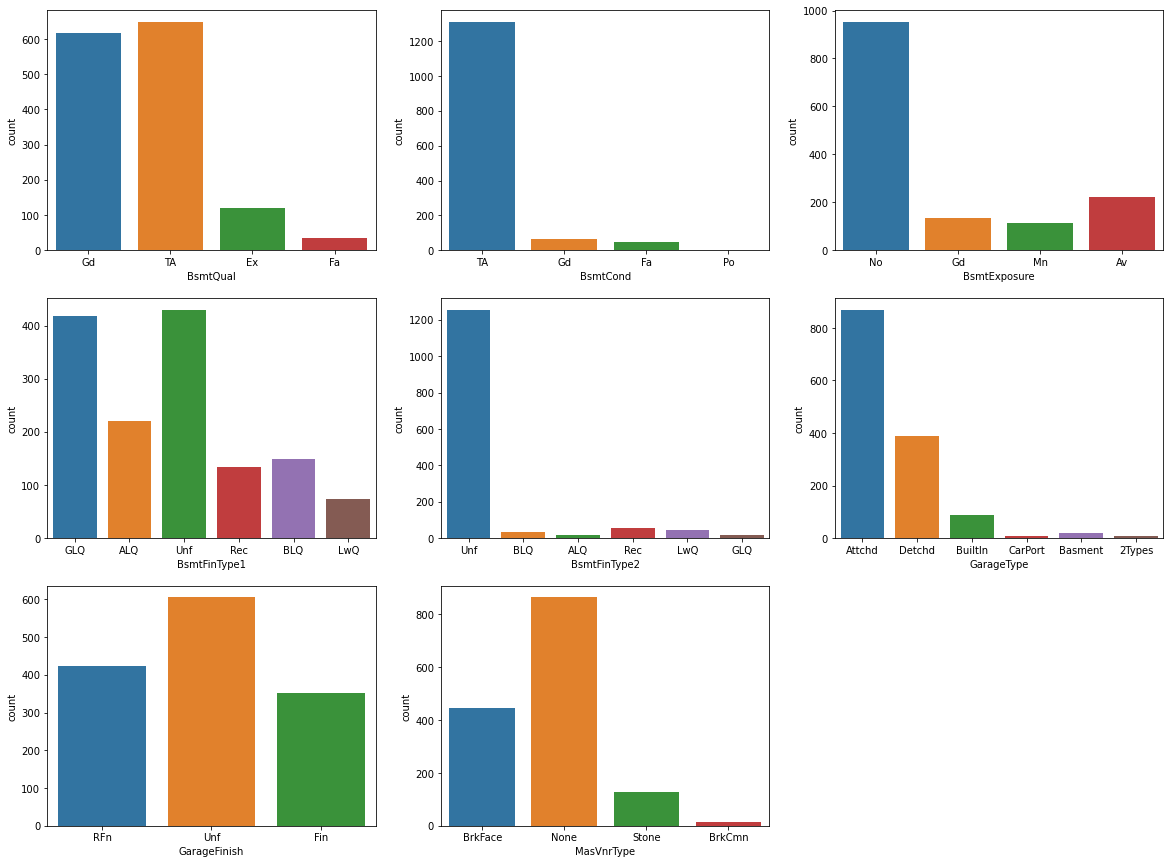

In [259]:
#plotting categorical features for ease of imputation

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x = 'BsmtQual', data = df)
plt.subplot(3,3,2)
sns.countplot(x = 'BsmtCond',  data = df)
plt.subplot(3,3,3)
sns.countplot(x = 'BsmtExposure', data = df)
plt.subplot(3,3,4)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(3,3,5)
sns.countplot(x = 'BsmtFinType2', data = df)
plt.subplot(3,3,6)
sns.countplot(x = 'GarageType',  data = df)
plt.subplot(3,3,7)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(3,3,8)
sns.countplot(x = 'MasVnrType', data = df)

plt.show()

In [260]:
# Imputing the missing values in ctegorical features

df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')

In [261]:
# Checking the features with missing values again

((df.isnull().sum()/df.shape[0])*100).round(2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
CentralAir       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces   

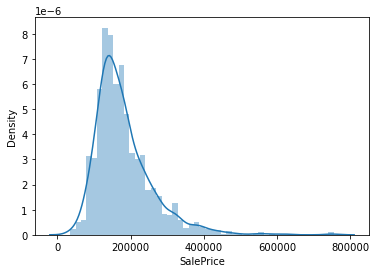

In [262]:
# Checking the target variable before proceeding to EDA and Feature Engineering

sns.distplot(df['SalePrice'])
plt.show()

In [263]:
# Here we can see that our target variable is right skewed. Using Log transform to shaping it to normal distribution

df['SalePrice']=np.log(df['SalePrice'])

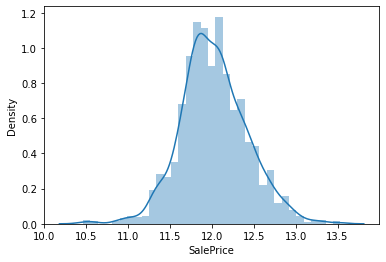

In [264]:
sns.distplot(df['SalePrice'])
plt.show()

##### Summary:
    - Dropped features with more than 45% missing values and highly imbalanced features
    - Replaced missing values based on datatype and plots
    - Checked the target variable and transformed it to normal distribution

### EDA Post Cleaning

In [265]:
# Seperating numerical and categorical features

num_cols = ['LotArea','LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'GrLivArea',  'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', 'ScreenPorch']
 
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'Fireplaces',
           'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 
            'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
           'CentralAir',  'KitchenQual',  'GarageType','GarageFinish', 'GarageCars',
             'PavedDrive','MoSold' ,'YrSold','SaleType','SaleCondition']


<Figure size 432x432 with 0 Axes>

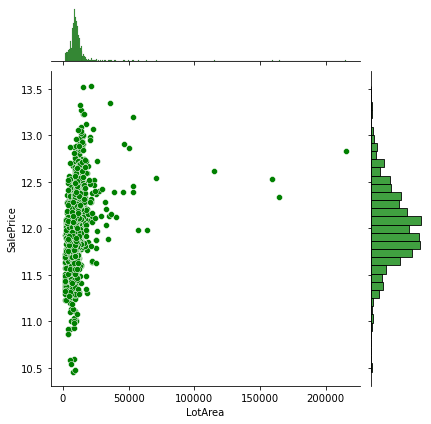

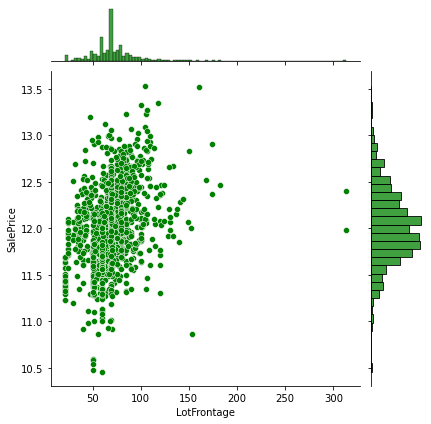

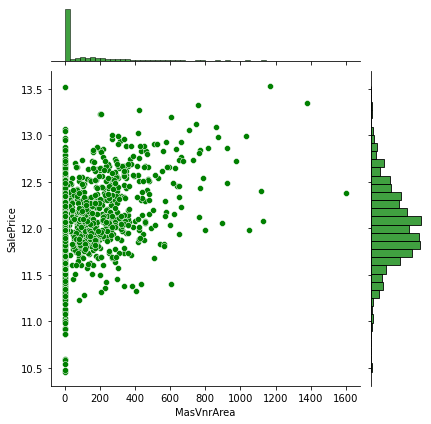

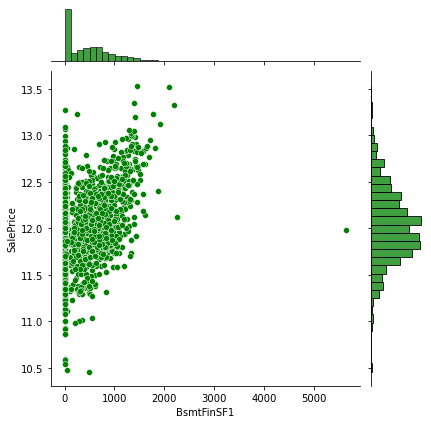

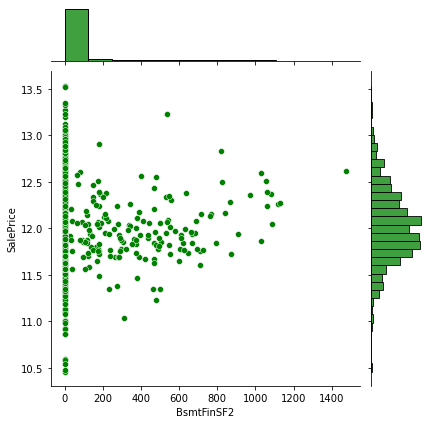

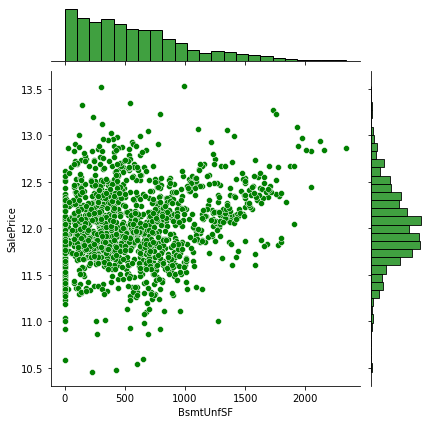

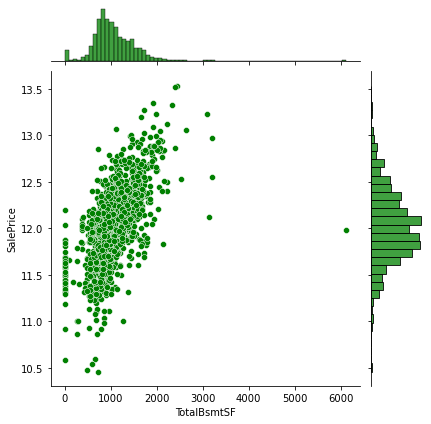

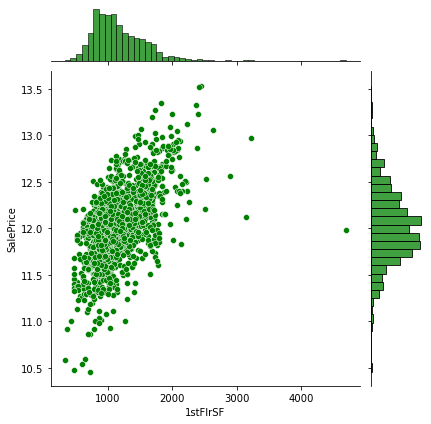

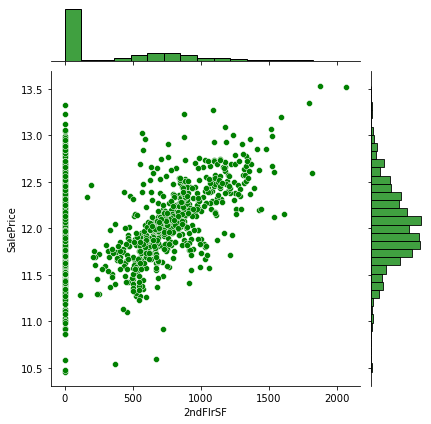

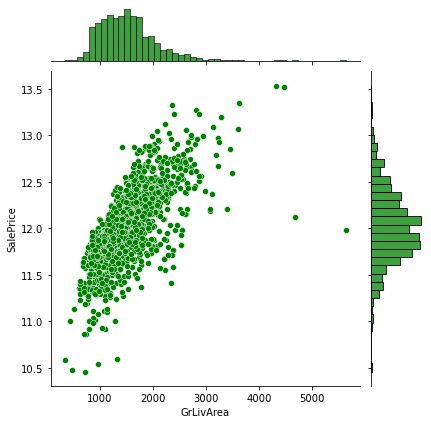

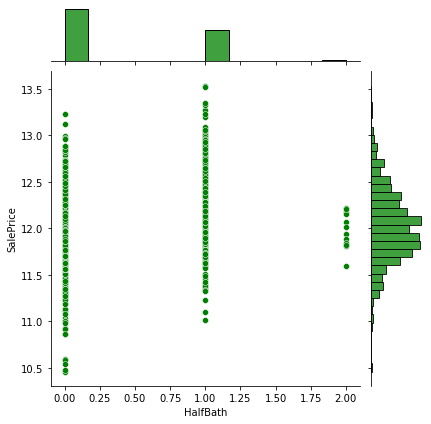

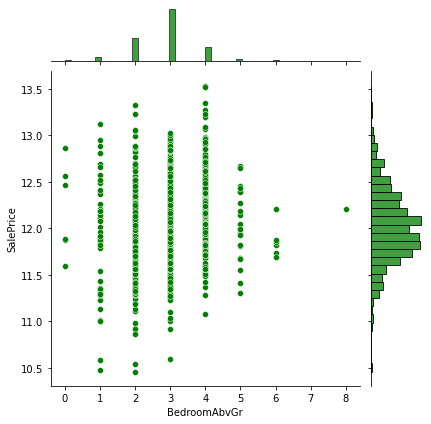

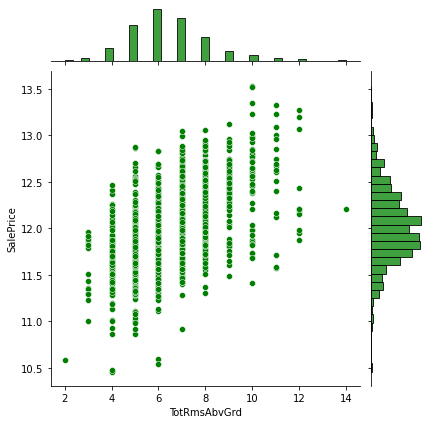

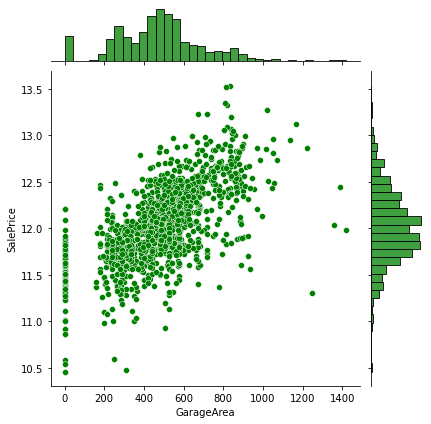

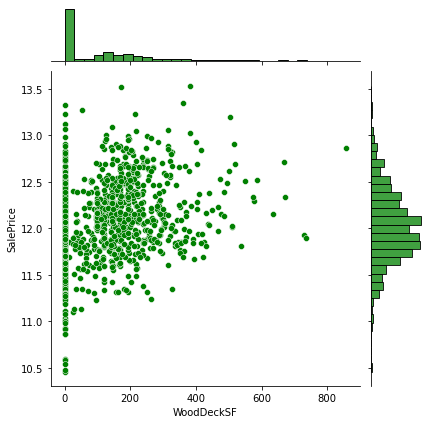

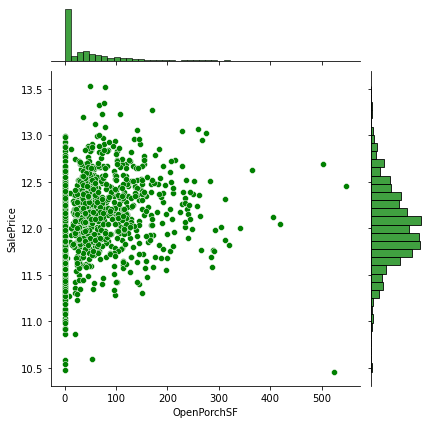

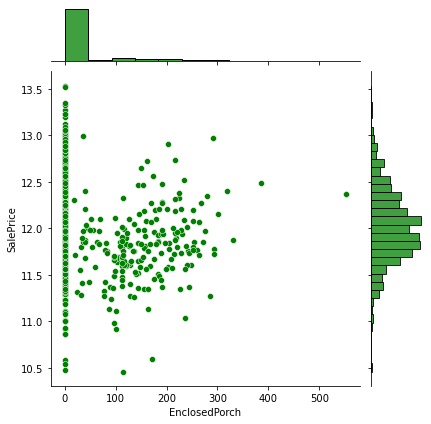

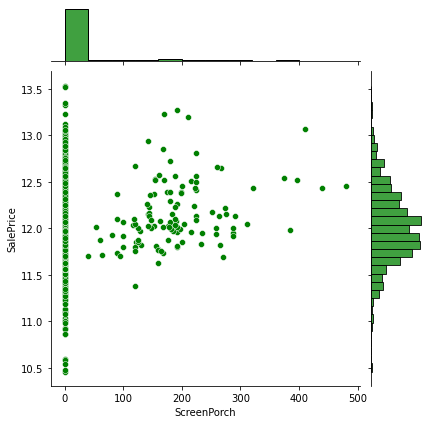

In [266]:
# plotting all the numerical variables

plt.figure(figsize=[6, 6])
for col in num_cols:
    sns.jointplot(x=df[col], y=df['SalePrice'], data=df, color='green')
    plt.show()

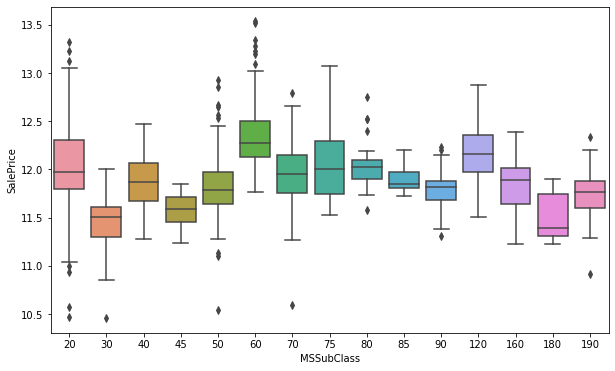

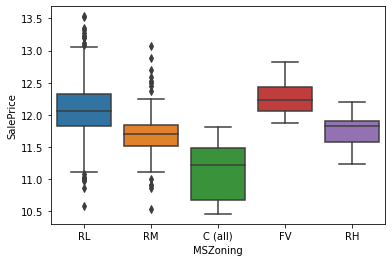

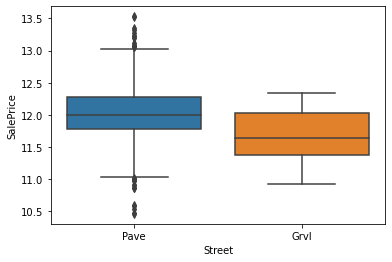

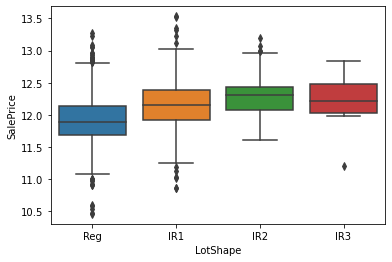

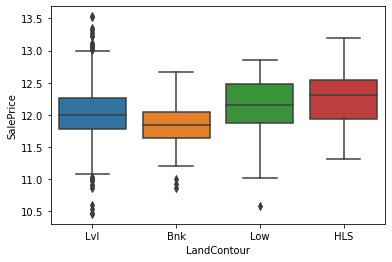

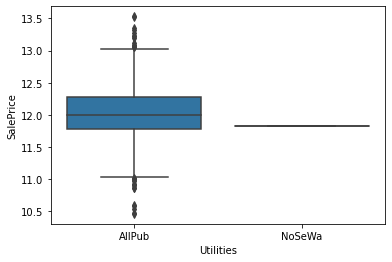

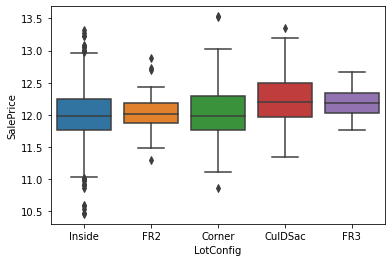

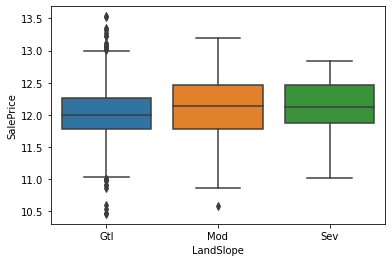

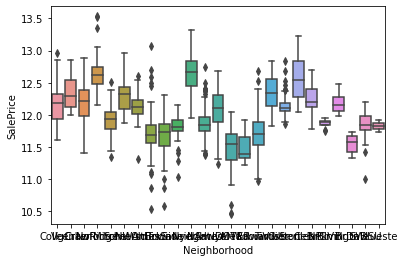

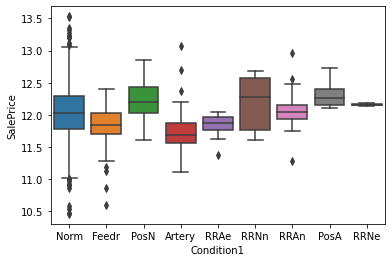

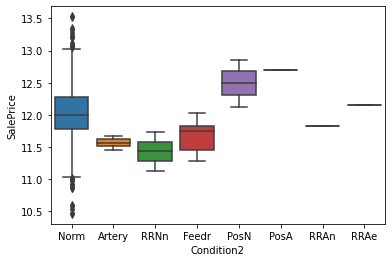

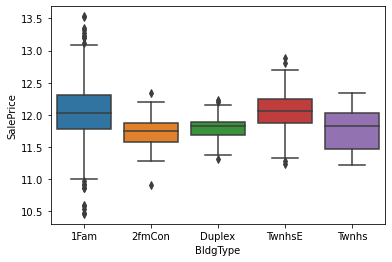

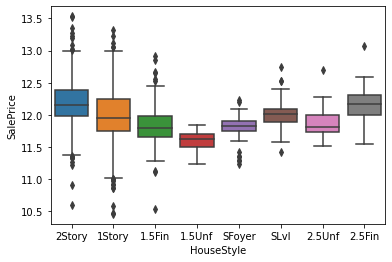

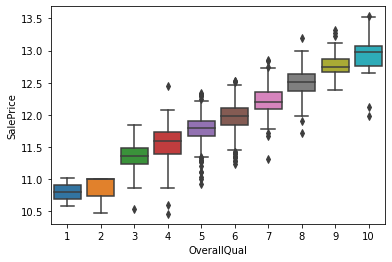

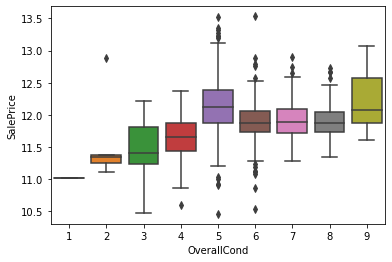

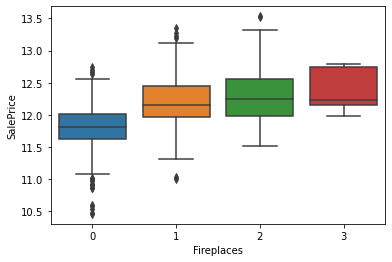

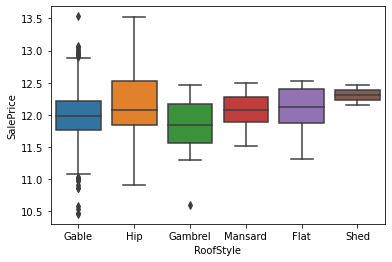

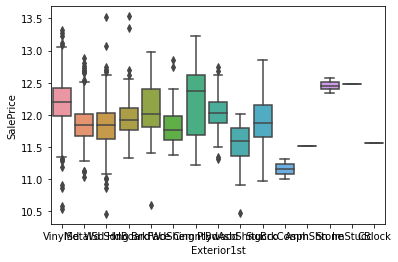

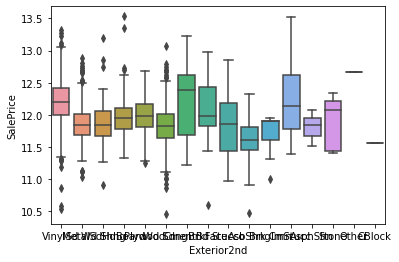

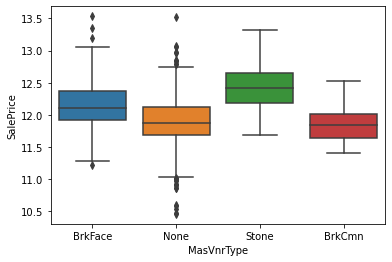

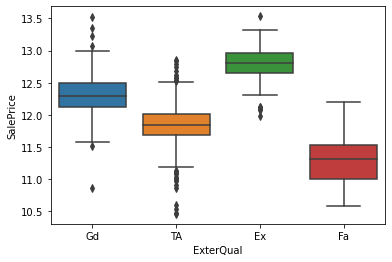

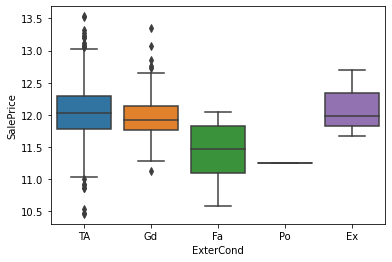

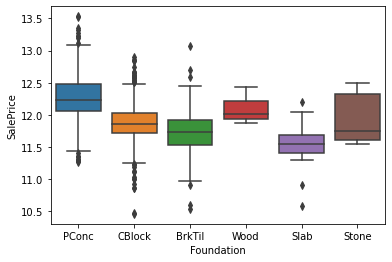

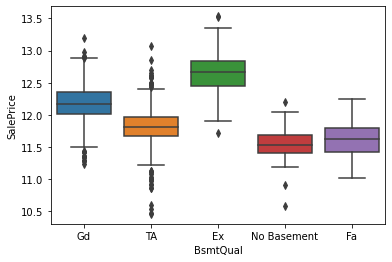

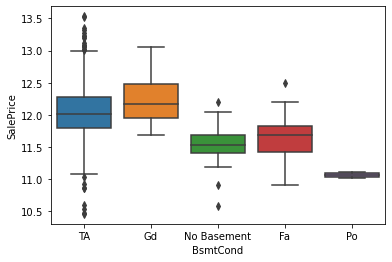

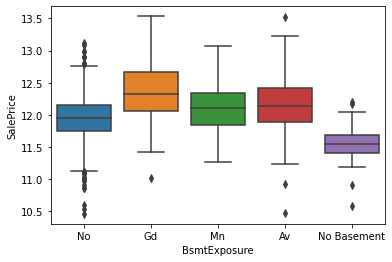

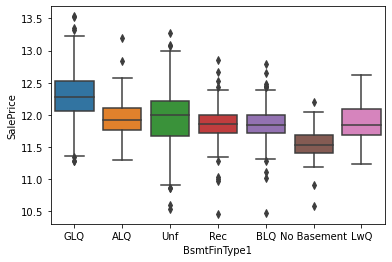

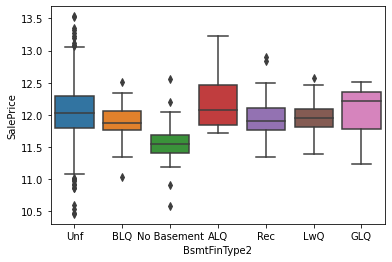

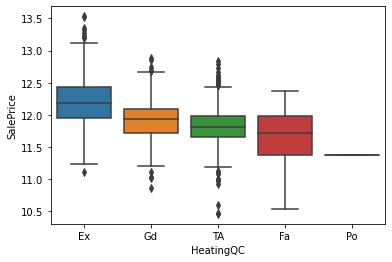

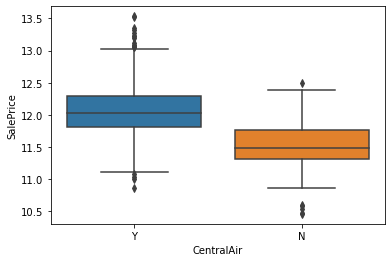

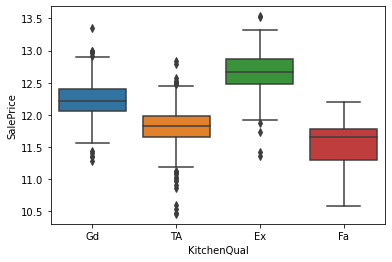

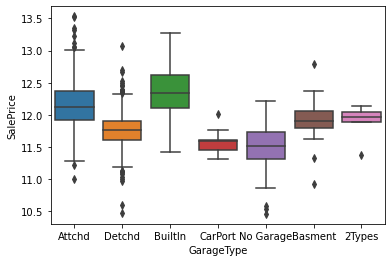

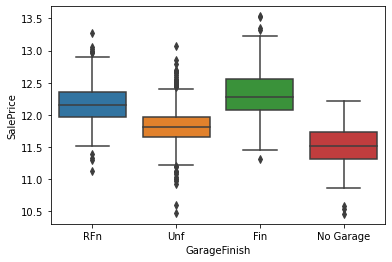

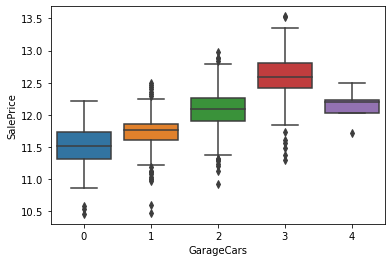

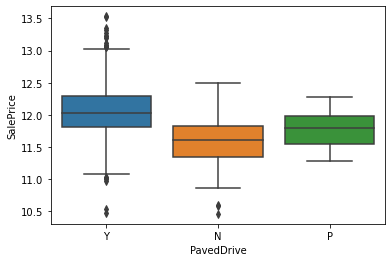

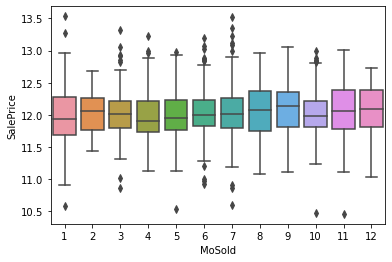

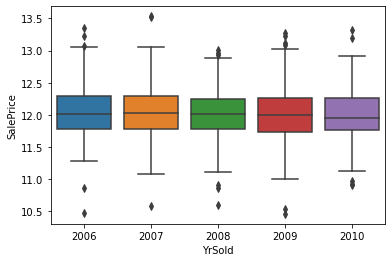

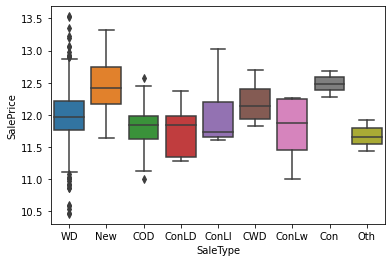

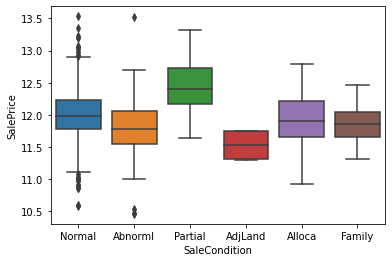

In [267]:
# plotting all the categorical variables

plt.figure(figsize=[10, 6])
for col in cat_cols:
    sns.boxplot(x=df[col], y=df['SalePrice'], data=df)
    plt.show()

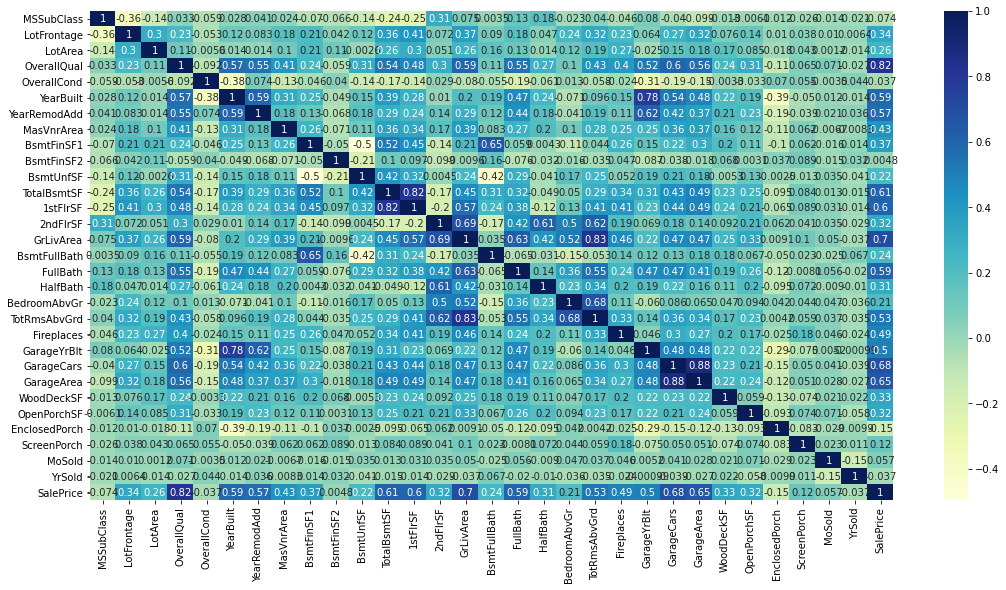

In [268]:
# plotting correlations on a heatmap

plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Feature Engineering

In [269]:
# Changing classes of categorical columns from numerical value to class name for ease in dummification

df['OverallQual']=df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [270]:
df['OverallCond']=df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [271]:
df['MSSubClass']=df['MSSubClass'].replace({ 20:'1-STORY 1946 & NEWER ALL STYLES',
                                            30:'1-STORY 1945 & OLDER',
                                            40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                            45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                            50:'1-1/2 STORY FINISHED ALL AGES',
                                            60:'2-STORY 1946 & NEWER',
                                            70:'2-STORY 1945 & OLDER',
                                            75:'2-1/2 STORY ALL AGES',
                                            80:'SPLIT OR MULTI-LEVEL',
                                            85:'SPLIT FOYER',
                                            90:'DUPLEX - ALL STYLES AND AGES',
                                           120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                           150:'1-1/2 STORY PUD - ALL AGES',
                                           160:'2-STORY PUD - 1946 & NEWER',
                                           180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                           190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [272]:
# Creating a few new features to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [273]:
# Creating dummy variables for all the categorical features. Also, dropping the first column to avoid 
# multicollinearity.
for col in cat_cols:
    dummies = pd.get_dummies(df[col], drop_first = True)
    dummies = dummies.add_prefix(f'{col}_')
    df = pd.concat([df, dummies], axis = 1)
    df.drop([col], axis = 1, inplace = True)

In [274]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,Fireplaces_1,Fireplaces_2,Fireplaces_3,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars

In [275]:
df.shape

(1460, 252)

After dummification we have 252 features in total. We will check for outliers statistically and collinearity of features & drop the columns if required.

In [276]:
# If we see the plots we can see that there are some columns with outliers. 

z_score = np.abs(stats.zscore(df[num_cols]))
z_score

array([[0.20714171, 0.22087509, 0.51410389, ..., 0.21650316, 0.3593249 ,
        0.27020835],
       [0.09188637, 0.46031974, 0.57075013, ..., 0.70448325, 0.3593249 ,
        0.27020835],
       [0.07347998, 0.08463612, 0.32591493, ..., 0.07036146, 0.3593249 ,
        0.27020835],
       ...,
       [0.14781027, 0.1754621 , 0.57075013, ..., 0.20140502, 0.3593249 ,
        0.27020835],
       [0.08016039, 0.08463612, 0.57075013, ..., 0.70448325, 1.47378925,
        0.27020835],
       [0.05811155, 0.23325479, 0.57075013, ..., 0.32219013, 0.3593249 ,
        0.27020835]])

In [277]:
# Removing data points above -3 & +3 standard deviation

rm_outlier = df[num_cols][(z_score < 3).all(axis=1)]
df = df.loc[rm_outlier.index]

In [278]:
df.shape

(1193, 252)

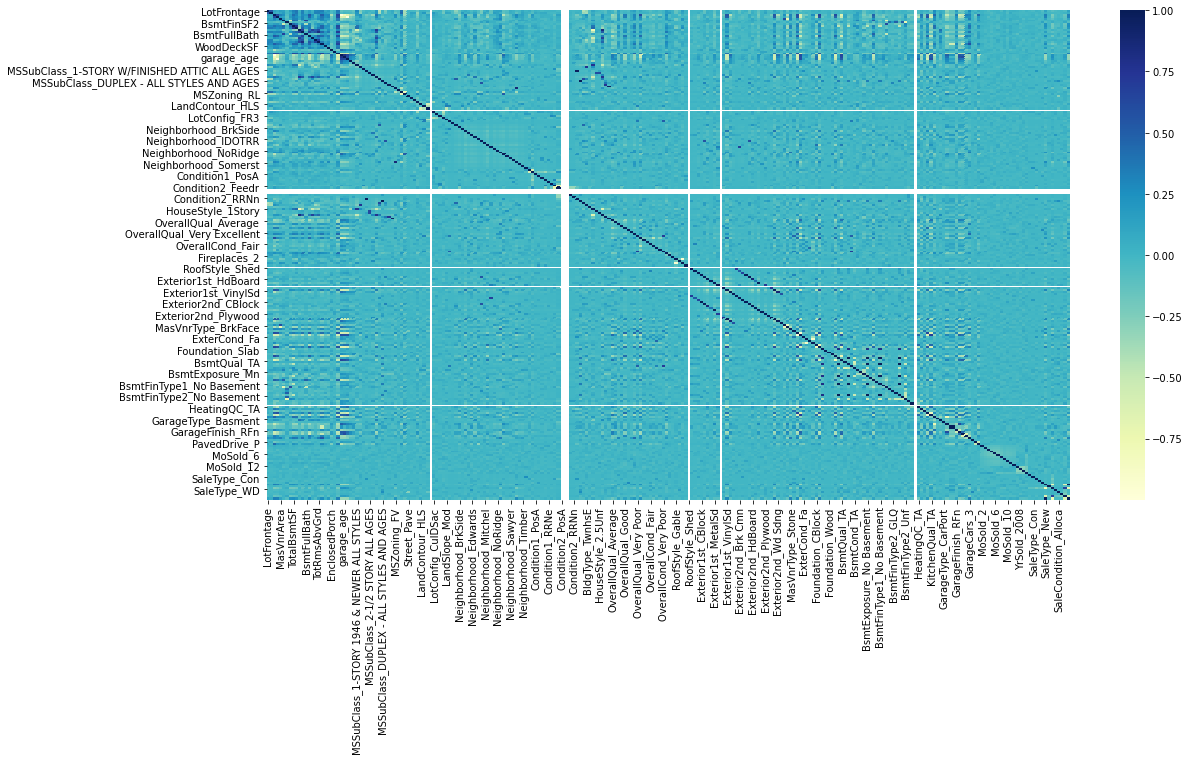

In [279]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

##### Summary:
    - Started with mapping classes with numerical values to actual class name mentioned in the data dictionary
    - Created three new features 'age', 'garage_age', 'remodel_age' which might be good predictors
    - Created dummy variables for all the categorical columns. There were total of 252 features post dummification
    - Removed outliers. There was a reduction(decreased down to 1193) in number of tuples after outlier removal.
    - As it can be seen in the heatmap, its highly dense. Hence, feature selection will be required for modelling.

### Splitting the data

In [280]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [282]:
print(X_train.shape)
print(X_test.shape)

(894, 251)
(299, 251)


### Transforming the data: Scaling

In [283]:
# Using minMaxScaler to scale the data

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = mms.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [284]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,garage_age,remodel_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,Fireplaces_1,Fireplaces_2,Fireplaces_3,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageC

### Modelling

    - First I am going to fit a Ridge regression then will jump to lasso regression.

#### A. Ridge Regression

In [285]:
# Taking a set of alphas for the model
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# Using GridSearchCV for Cross Validation
folds = 10
r_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
r_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [286]:
r_cv_results = pd.DataFrame(r_model_cv.cv_results_)
r_cv_results = r_cv_results[r_cv_results['param_alpha']<=100]
r_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005095,0.000778,0.001911,0.000229,0.00001,{'alpha': 1e-05},0.894124,0.832075,0.720931,0.725120,0.855121,0.833221,0.791427,0.816882,0.856729,0.906656,0.823229,0.059536,7,0.952264,0.954281,0.952847,0.954213,0.953817,0.955023,0.959350,0.955632,0.953311,0.953671,0.954441,0.001884
1,0.004497,0.000241,0.002011,0.000279,0.0001,{'alpha': 0.0001},0.894152,0.832191,0.721517,0.725343,0.855179,0.833212,0.791477,0.816953,0.856836,0.906690,0.823355,0.059414,6,0.952264,0.954281,0.952847,0.954213,0.953817,0.955023,0.959350,0.955632,0.953311,0.953671,0.954441,0.001884
2,0.004522,0.000402,0.002066,0.000422,0.001,{'alpha': 0.001},0.894427,0.833328,0.727166,0.727526,0.855751,0.833120,0.791966,0.817656,0.857881,0.907018,0.824584,0.058245,5,0.952264,0.954281,0.952846,0.954212,0.953817,0.955023,0.959350,0.955632,0.953310,0.953670,0.954441,0.001884
3,0.004244,0.000303,0.001871,0.000332,0.01,{'alpha': 0.01},0.896929,0.842678,0.767964,0.745934,0.860784,0.832443,0.795669,0.823849,0.866578,0.909420,0.834225,0.050192,4,0.952235,0.954237,0.952812,0.954161,0.953801,0.955012,0.959323,0.955619,0.953273,0.953635,0.954411,0.001887
4,0.005143,0.002053,0.002262,0.000620,0.1,{'alpha': 0.1},0.910583,0.877174,0.859141,0.821603,0.883593,0.837970,0.803871,0.852624,0.898423,0.915420,0.866040,0.035719,2,0.951573,0.953397,0.952273,0.953377,0.953322,0.954690,0.958775,0.955230,0.952554,0.952983,0.953818,0.001941


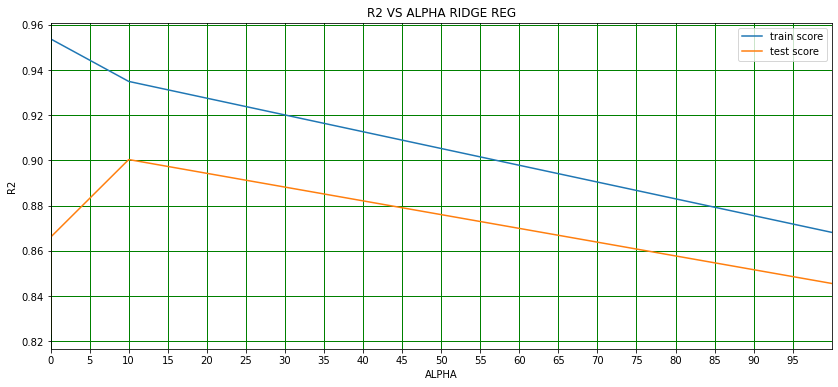

In [287]:
# plotting mean test and train scoes with alpha 
r_cv_results['param_alpha'] = r_cv_results['param_alpha'].astype('int32')

plt.figure(figsize=[14,6])
plt.plot(r_cv_results['param_alpha'], r_cv_results['mean_train_score'])
plt.plot(r_cv_results['param_alpha'], r_cv_results['mean_test_score'])
plt.xlabel('ALPHA')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.ylabel('R2')
plt.title("R2 VS ALPHA RIDGE REG")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()

In [288]:
# From the plot we can see that the optimum alpha is 10

alpha = 10
ridge_final = Ridge(alpha=alpha)

ridge_final.fit(X_train, y_train)

Ridge(alpha=10)

In [289]:
# Checking coefficients for this final model
ridge_final.coef_

array([ 5.47735129e-02,  7.61251388e-02,  5.55315555e-02,  3.40305599e-02,
        8.32155350e-03,  1.32113119e-01, -4.67869454e-04,  3.18626413e-02,
        1.29084302e-01,  1.76209748e-01,  6.28643880e-02,  1.56901400e-01,
        2.78723439e-02,  1.10115319e-01,  3.42849460e-02,  5.68431075e-02,
        8.86117644e-02,  6.37558651e-02,  5.86796950e-02,  4.46831842e-02,
        3.98090176e-03,  1.84304232e-02, -5.64042356e-02, -2.15362549e-02,
       -3.50831090e-02,  3.80973644e-02, -3.76011465e-02,  1.28044946e-02,
        6.43552319e-03, -1.04097349e-02, -1.40776072e-02,  6.94378430e-03,
        4.96192282e-02,  2.59236599e-02, -4.88559632e-02, -1.74716432e-03,
       -1.87178860e-02, -2.06021315e-03, -7.97907251e-03,  6.29327566e-02,
        1.35903982e-02,  6.43635336e-02,  2.08523377e-02,  2.29382607e-02,
        1.81190306e-02, -1.21787775e-03,  7.06695249e-03,  3.56342885e-02,
       -3.51437474e-02,  2.66757455e-02,  0.00000000e+00,  4.14141517e-02,
       -1.78361646e-02, -

In [290]:
# Checking the score for test set
ridge_final.score(X_test,y_test)

0.9016162209773171

In [291]:
# Checking R2 score for the model on test data
y_test_pred_ridge = ridge_final.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9016162209773171


In [292]:
#Creating a dataframe of the coefficients of the final ridge model
ridge_coef = pd.DataFrame(np.atleast_2d(ridge_final.coef_),columns=X_train.columns)
ridge_coef = ridge_coef.T
ridge_coef.rename(columns={0: 'Ridge Coefficients'},inplace=True)
ridge_coef.sort_values(by=['Ridge Coefficients'], ascending=False,inplace=True)
ridge_coef.head(20)

,Ridge Coefficients
1stFlrSF,0.176210
GrLivArea,0.156901
BsmtFinSF1,0.132113
TotalBsmtSF,0.129084
FullBath,0.110115
Neighborhood_Crawfor,0.098211
OverallQual_Excellent,0.092452
TotRmsAbvGrd,0.088612
OverallQual_Very Good,0.082370
LotArea,0.076125


##### Summary:
    - Started modelling with fitting a Ridge Regression using a set of alphas and also used GridSearchCV for cross 
      validation with 10 folds
    - Found Optimum alpha as 10 and acheived an accuracy of 90%.
    - Listed out the top 20 features that will effect the pricing of the properties.

#### B. Lasso Regression

In [293]:
# Taking a new set of alphas for Lasso
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}

lasso = Lasso()

# Using GridSearchCV for Cross Validation
folds = 10
l_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

l_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [294]:
l_cv_results = pd.DataFrame(l_model_cv.cv_results_)
l_cv_results = l_cv_results[l_cv_results['param_alpha']<=100]
l_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.066876,0.020757,0.002610,0.001526,0.00006,{'alpha': 6e-05},0.922344,0.902197,0.897207,0.888574,0.901951,0.834231,0.805283,0.875286,0.905802,0.917566,0.885044,0.035580,4,0.949762,0.950985,0.950481,0.951340,0.951528,0.953182,0.957130,0.953831,0.951177,0.951062,0.952048,0.002040
1,0.042541,0.023912,0.002045,0.001017,0.0006,{'alpha': 0.0006},0.939328,0.896759,0.918170,0.918527,0.894981,0.897777,0.795812,0.884674,0.921945,0.922454,0.899043,0.037851,1,0.930348,0.934470,0.932649,0.933415,0.933656,0.935288,0.942421,0.935543,0.932421,0.932746,0.934296,0.003066
2,0.028819,0.007241,0.001721,0.000054,0.0008,{'alpha': 0.0008},0.937553,0.895199,0.916395,0.916662,0.891436,0.900274,0.796140,0.883286,0.918971,0.920456,0.897637,0.037205,2,0.926181,0.929943,0.927898,0.928811,0.929785,0.930598,0.938525,0.930839,0.928320,0.927815,0.929872,0.003188
3,0.021064,0.010493,0.002032,0.001031,0.001,{'alpha': 0.001},0.935405,0.891125,0.913580,0.915634,0.888017,0.900407,0.796430,0.879062,0.915740,0.917057,0.895246,0.036582,3,0.922241,0.925436,0.923922,0.924749,0.925938,0.926457,0.934345,0.926625,0.924416,0.923463,0.925759,0.003146
4,0.017645,0.008551,0.001852,0.000491,0.002,{'alpha': 0.002},0.927821,0.862516,0.905240,0.903829,0.869067,0.894828,0.801364,0.862708,0.904845,0.902824,0.883504,0.034110,5,0.904559,0.907370,0.906806,0.907571,0.908668,0.908756,0.916505,0.910706,0.907927,0.906082,0.908495,0.003095


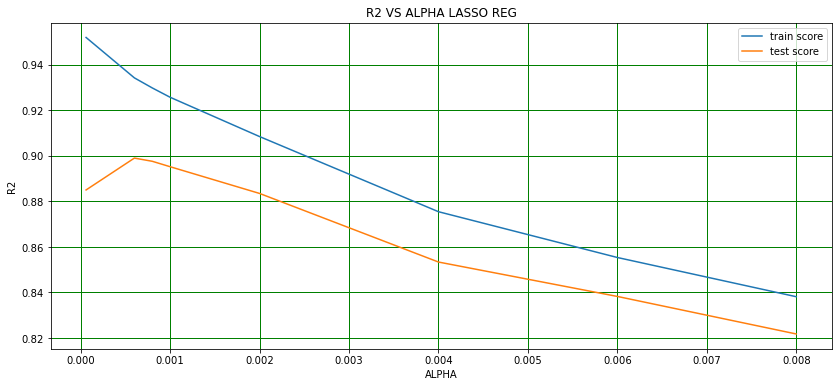

In [295]:
# plotting mean test and train scoes with alpha 
l_cv_results['param_alpha'] = l_cv_results['param_alpha'].astype('float32')

plt.figure(figsize=[14,6])
plt.plot(l_cv_results['param_alpha'], l_cv_results['mean_train_score'])
plt.plot(l_cv_results['param_alpha'], l_cv_results['mean_test_score'])
plt.xlabel('ALPHA')
plt.ylabel('R2')
plt.title("R2 VS ALPHA LASSO REG")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid(color='g', linestyle='-', linewidth=1)
plt.show()


In [296]:
# From the plot we can see that the optimum alpha is 0.0006

alpha = 0.0006
lasso_final = Lasso(alpha=alpha)

lasso_final.fit(X_train, y_train)

Lasso(alpha=0.0006)

In [297]:
# Checking coefficients for this final lasso model
lasso_final.coef_

array([ 0.0496672 ,  0.09263379,  0.        ,  0.03029791,  0.        ,
        0.15630607,  0.        ,  0.        ,  0.20362527,  0.11673108,
        0.        ,  0.46636758,  0.00177486,  0.11828181,  0.03592569,
        0.02778058,  0.02445912,  0.08613244,  0.05811679,  0.03046017,
        0.        ,  0.        , -0.21349731, -0.        , -0.02558151,
        0.03157038, -0.01669121,  0.00872398,  0.        , -0.        ,
       -0.        , -0.        ,  0.037412  ,  0.02374256, -0.04815006,
       -0.00094875, -0.        , -0.        ,  0.        ,  0.07317187,
        0.        ,  0.04108951,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00640399,  0.02199172, -0.03716517,  0.01869611,
        0.        ,  0.03848823, -0.        ,  0.        , -0.00535588,
       -0.        , -0.        , -0.        ,  0.        ,  0.02991888,
        0.        , -0.        ,  0.13288954, -0.02450656, -0.        ,
       -0.06190129, -0.07246169, -0.        ,  0.00748117,  0.  

In [298]:
# Checking the score for test set
lasso_final.score(X_test,y_test)

0.9056458536845001

In [299]:
# Checking R2 score for the model on test data
y_test_pred_lasso = lasso_final.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9056458536845001


In [300]:
#Creating a dataframe of the coefficients of the final ridge model
lasso_coef = pd.DataFrame(np.atleast_2d(lasso_final.coef_),columns=X_train.columns)
lasso_coef = lasso_coef.T
lasso_coef.rename(columns={0: 'Lasso Coefficients'},inplace=True)
lasso_coef.sort_values(by=['Lasso Coefficients'], ascending=False,inplace=True)
lasso_coef.head(20)

,Lasso Coefficients
GrLivArea,0.466368
TotalBsmtSF,0.203625
BsmtFinSF1,0.156306
OverallQual_Excellent,0.148409
Neighborhood_Crawfor,0.132890
FullBath,0.118282
1stFlrSF,0.116731
OverallQual_Very Good,0.093672
LotArea,0.092634
GarageArea,0.086132


##### Summary:
    - Took a new set of alphas for Lasso and used GridSearchCV for cross-validation with 10 folds
    - Found Optimum alpha as 0.0006 and acheived an accuracy of 91%.
    - Lasso Regression gave us a simpler model with most of the coefficients as zero values.
    - Listed out the top 20 features that will effect the pricing of the properties.

### Conclusion:

#### Ridge Regression:
- Score on test set: 90%
- Optimal Values of alpha: 10
- Top 5 most significant features:
        1. 1stFlrSF	     0.176210
        2. GrLivArea	 0.156901
        3. BsmtFinSF1	 0.132113
        4. TotalBsmtSF	 0.129084
        5. FullBath	     0.110115
        
#### Lasso Regression:
- Score on test set: 91%
- Optimal Values of alpha: 0.0006
- Top 5 most significant features:
        1. GrLivArea	            0.466368
        2. TotalBsmtSF	            0.203625
        3. BsmtFinSF1	            0.156306
        4. OverallQual_Excellent	0.148409
        5. Neighborhood_Crawfor	    0.132890
  
- The best model to go with this problem statement is Lasso as it provides feature selection with better accuracy.